Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



## Importações



In [1]:
from graphviz import Digraph
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [2]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [3]:
x1 = Valor(60)
print(x1)
print(x1.data)

Valor(data=60)
60


<font color='red'><font size='4'>*Começamos definindo uma classe que irá computar os valores de cada nó do nosso grafo. Assim, ela recebe e armazena o valor inicial.*

### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [4]:
a = Valor(10)
b = Valor(5)

In [5]:
print(a + b)

TypeError: unsupported operand type(s) for +: 'Valor' and 'Valor'

In [6]:
print(a * b)

TypeError: unsupported operand type(s) for *: 'Valor' and 'Valor'

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [7]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [8]:
c = Valor(15)
d = Valor(10)
e = c + d
f = c * d
print(e, f)

Valor(data=25) Valor(data=150)


<font color='red'><font size='4'>*Vimos que não conseguimos realizar a soma ou o produto com os valores da classe e isso acontece por causa da falta de definição de uma soma ou produto. Como vimos antes, precisamos determinar como nossa classe interage com funções/operadores/métodos usando os dunders. Assim, após definirmos da forma que achamos mais razoável, podemos obter a interação dos valores da classe com os operadores e assim utilizá-los normalmente.*

### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [9]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [10]:
a = Valor(10)
c = a + a

print(a.data, a.progenitor)
print(c.data, c.progenitor)

10 ()
20 (Valor(data=10), Valor(data=10))


<font color='red'><font size='4'>*No intuito de formar um grafo para uma sequência de equações, é bom registrar os progenitores, ou seja, os valores usados para encontrar um novo valor. Assim, apenas registramos o valor ao qual um valor foi operado e retornamos ambos.*

### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [11]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [12]:
a = Valor(10)
c = a + a
d = a*a

print(a.data, a.progenitor, a.operador_mae)
print(c.data, c.progenitor, c.operador_mae)
print(d.data, d.progenitor, d.operador_mae)

10 () 
20 (Valor(data=10), Valor(data=10)) +
100 (Valor(data=10), Valor(data=10)) *


<font color='red'><font size='4'>*Por fim, precisamos apenas registrar a operação que gerou um novo valor. Para isso, armazenamos o símbolo da operação e o retornamos.*

### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



In [13]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

g = plota_grafo(e)
print(g)

digraph {
	graph [rankdir=LR]
	1964111029776 [label="{ data 2.0000 }" shape=record]
	1964111029392 [label="{ data -6.0000 }" shape=record]
	"1964111029392*" [label="*"]
	"1964111029392*" -> 1964111029392
	1964110304112 [label="{ data 4.0000 }" shape=record]
	"1964110304112+" [label="+"]
	"1964110304112+" -> 1964110304112
	1964111029152 [label="{ data 10.0000 }" shape=record]
	1964111028672 [label="{ data -3.0000 }" shape=record]
	1964111028672 -> "1964111029392*"
	1964111029776 -> "1964111029392*"
	1964111029152 -> "1964110304112+"
	1964111029392 -> "1964110304112+"
}



<font color='red'><font size='4'>*Com isso, podemos finalmente plotar o grafo da nossa equação, o qual fica devidamente representado e evidencia cada passo feito para chegar no valor final.*

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [14]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



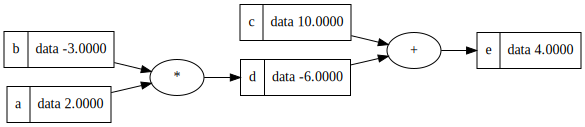

In [15]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

g = plota_grafo(e)
g

<font color='red'><font size='4'>*Vimos que podemos criar o grafo com os valores, mas falta algo para organizar melhor a leitura dele. Para isso, colocamos as labels de cada nó, as quais representam os valores, sejam de input ou calculados algo longo do processo. Assim, temos o entendimento completo do grafo e nossa classe pode nos ajudar a gerar qualquer grafo.*

### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



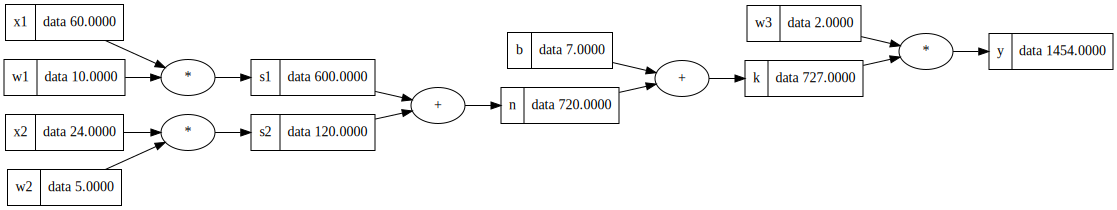

In [16]:
x1 = Valor(60, rotulo='x1')
x2 = Valor(24, rotulo='x2')
w1 = Valor(10, rotulo='w1')
w2 = Valor(5, rotulo='w2')
w3 = Valor(2, rotulo='w3')
b = Valor(7, rotulo='b')

s1 = x1*w1
s1.rotulo = 's1'
s2 = x2*w2
s2.rotulo = 's2'

n = s1+s2
n.rotulo = 'n'

k = n+b
k.rotulo = 'k'

y = k*w3
y.rotulo = 'y'

g = plota_grafo(y)
g

<font color='red'><font size='4'>*Finalizando, aqui reproduzimos um grafo construido conjuntamente em sala de aula, onde havia um contexto climático que serviu apenas de inspiração para colocarmos valores iniciais razoáveis. Dessa forma, usamos a classe criada para operar os valores e conferir suas respectivas labels. Com isso, temos as informações necessárias para construir o grafo (valor, progenitores, operação e label).*

## Conclusão



<font color='red'><font size='4'>*Nesse experimento, vimos a construção de uma classe no intuito de produzir um grafo, o qual deveria reproduzir uma sequência de equações matemáticas para encontrar um valor final desejado. Assim, a classe foi aos poucos incorporando as características necessárias para isso, os valores iniciais, a possibilidade de operá-los, o armazenamento dos valores usados para criar um novo e a operação usada e a label que representa o valor. A partir disso, a biblioteca de grafos possui todas as informações para nos fornecer o grafo e sua visualização. Logo, é notável que o uso de classes se mostra extremamente satisfatório para nos ajudar nesse contexto, já que o uso de funções e listas apenas poderia gerar confusão e com certeza nos daria mais trabalho.*

## Playground



#### <font color='yellow'><font size='4'>Resolvendo um problema de álgebra

Dado um espaço vetorial $\mathcal{V}$ com as seguintes definições de soma e produto entre dois vetores $u = (a,b)$ e $v = (c,d)$:
- $$u + v = (a + d, b + c)$$
- $$u \cdot v = (a \cdot d, b \cdot c)$$
onde $a,b,c,d \in \mathcal{R}$, determine se $\mathcal{V}$ é, de fato, um espaço vetorial. 

In [17]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        for i in range(len(self.data)):
            #print(self.data, outro_valor.data, self.data[i], outro_valor.data[1 - i])
            self.data[i] = self.data[i] + outro_valor.data[1 - i]
        #data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(self.data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        for i in range(len(self.data)):
            #print(self.data, outro_valor.data, self.data[i], outro_valor.data[1 - i])
            self.data[i] = self.data[i] * outro_valor.data[1 - i]
        #data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(self.data, progenitor, operador_mae)
        return saida

In [18]:
a = 2
b = -6
c = 3
d = 1

In [19]:
u = Valor([a,b])
v = Valor([c,d])
print(u, v)

Valor(data=[2, -6]) Valor(data=[3, 1])


In [20]:
print(u + v)

Valor(data=[3, -3])


In [21]:
print(u * v)

Valor(data=[3, -9])
